## 1. 라이브러리 불러오기
- PIL: 이미지 처리 라이브러리 (설치가 안되어 있다면 윈도우 command 창을 열고 "pip install pillow" 실행)
- numpy: 수치 라이브러리
- matplotlib: 그래프 그릴 때 사용하는 라이브러리

In [1]:
from PIL import Image  # 이미지 처리 라이브러리
import numpy as np  # 수치 라이브러리
import matplotlib.pyplot as plt  # 그래프를 그리기 위한 라이브러리

## 2. 이미지 처리
- Expression_ctrl.png, Expression_L5.png (논문에서 캡쳐하여 저장)

### 2.1 이미지 열기

In [2]:
imgCtrl = Image.open("Expression_ctrl.png")
imgL5 = Image.open("Expression_L5.png")

### 2.2 이미지 가시화

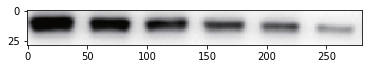

In [3]:
plt.imshow(imgCtrl)

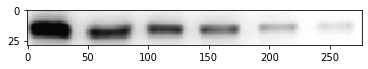

In [4]:
plt.imshow(imgL5)

### 2.3 이미지를 흑백으로 변환
- 위의 그림이 흑백인 것 같지만 (R, G, B) 값을 모두 가지고 있기 때문에 흑백으로 변경하여 처리

In [5]:
imgCtrlGray = imgCtrl.convert('L')
imgL5Gray = imgL5.convert('L')

### 2.4 이미지 크기 확인 및 특정 크기로 변환
- 크기는 이미지의 픽셀수를 나타냄
- 하나의 이미지가 각 시간에 대한 6개의 이미지로 분리, 이미지의 크기가 (32, 32)가 되도록 변환

In [6]:
print(imgCtrlGray.size)
print(imgL5Gray.size)

(280, 29)
(277, 29)


In [7]:
singleImgSize = (32, 32)
imgCount = 6
multipleImgSize = (singleImgSize[0]*imgCount, singleImgSize[1])

In [8]:
imgCtrlGray = imgCtrlGray.resize(multipleImgSize)  # 이미지 크기를 (32*6, 32)로 변환
imgL5Gray = imgL5Gray.resize(multipleImgSize)

### 2.5 이미지를 각각 6개의 시간에 대한 이미지로 분리 

In [9]:
imgListCtrl = []
imgListL5 = []

# Image를 6개로 잘라서 imgList에 저장
for i in range(imgCount):
    startPixel = i * singleImgSize[0]
    endPixel = (i+1) * singleImgSize[0]
    extractArea = (startPixel, 0, endPixel, singleImgSize[1])
    # print(extractArea)
    extractImgCtrl = imgCtrlGray.crop(extractArea)
    extractImgL5 = imgL5Gray.crop(extractArea)
    imgListCtrl.append(extractImgCtrl)  # 자른 이미지를 imgListCtrl에 추가
    imgListL5.append(extractImgL5)  # 자른 이미지를 imgListL5에 추가

### 2.6 각 이미지가 잘 분리됐는지 가시화를 통해 확인

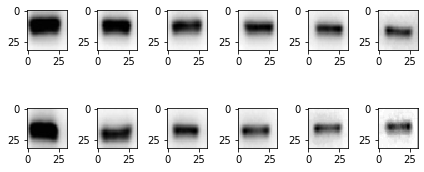

In [28]:
f, axarr = plt.subplots(2,imgCount,figsize=(6,3))
for i in range(imgCount):
    axarr[0][i].imshow(imgListCtrl[i], cmap="gray")
    axarr[1][i].imshow(imgListL5[i], cmap="gray")
plt.tight_layout()

### 2.7 각 이미지를 저장하고 싶다면

In [11]:
imgSaveFlag = False  # 저장하고 싶다면 True로 변경

if imgSaveFlag:
    for i, (imgC, imgL) in enumerate(zip(imgListCtrl, imgListL5)):
        fileNameCtrl = "ExprCtrl_" + str(i) + ".jpg"
        fileNameL5 = "ExprL5_" + str(i) + ".jpg"
        imgC.save(fileNameCtrl)
        imgL.save(fileNameL5)

## 3. 데이터 처리
- 각 이미지를 numpy array로 변환 (2차원 행렬로 변환)
- 변환된 행렬의 각 요소가 각 픽셀에서의 색상 값이 됨 (각 요소값의 범위는 0~255이며, 0이 검은색, 255가 흰색)
- 각 이미지마다 (255 - 각 요소의 값)을 모두 더하면 각 이미지의 intensity를 표현할 수 있을 듯 (모두 더한 값이 0이면 모두 흰색이라는 뜻)

### 3.1 각 이미지마다 픽셀값 더하기

In [12]:
intensityCtrl = []
intensityL5 = []

for imCtrl, imL5 in zip(imgListCtrl, imgListL5):
    arrCtrl = np.array(imCtrl)  # 이미지를 numpy.array로 변환
    arrL5 = np.array(imL5)  # 이미지를 numpy.array로 변환
    arrCtrlSum = np.sum(255 - arrCtrl)  # 255에서 각 행렬의 값을 뺀 후 모든 요소의 값을 더함
    arrL5Sum = np.sum(255 -  arrL5)  # 255에서 각 행렬의 값을 뺀 후 모든 요소의 값을 더함
    intensityCtrl.append(arrCtrlSum)  # 총 합을 sumListCtrl에 추가
    intensityL5.append(arrL5Sum)  # 총 합을 sumListL5에 추가
    
intensityCtrl = np.array(intensityCtrl)
intensityL5 = np.array(intensityL5)
normIntensityCtrl = intensityCtrl/intensityCtrl.max()*100  # 각 이미지마다 총 합을 최대값으로 normalization
normIntensityL5 = intensityL5/intensityL5.max()*100  # 각 이미지마다 총 합을 최대값으로 normalization
print(normIntensityCtrl)
print(normIntensityL5)

[100.          83.80291369  70.04964953  54.49594557  43.8616685
  24.75862424]
[100.          70.4151146   51.46900903  40.69515756  16.62471895
   5.87351925]


### 3.2 그래프 그리기

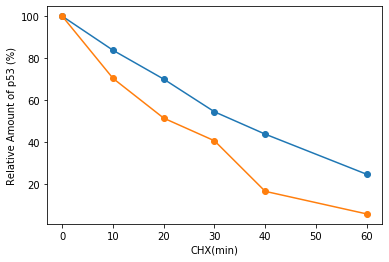

In [13]:
time = np.array([0, 10, 20, 30, 40, 60])  # 시간축 생성을 위한 배열
plt.xlabel("CHX(min)")
plt.ylabel("Relative Amount of p53 (%)")
plt.plot(time, normIntensityCtrl, time, normIntensityL5, marker='o')

### 주의할 점
- 이미지의 resizing에 의한 확대, 축소에 의해 각 픽셀의 색상값이 미세하게 바뀔 수 있음
- 이미지의 배경색이 완벽하게 흰색(255)은 아닌데, 이 값이 intensity에 영향을 줄 수 있음 (큰 차이는 아닐것으로 보이지만...) 